In [ ]:
#vintage analysis

In [2]:
#import dataset
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

vint_app = pd.read_csv("C:/Users/Prasad Rajaraman/Desktop/Data Mining/Final Project/application_record.csv")
vint_cred = pd.read_csv("C:/Users/Prasad Rajaraman/Desktop/Data Mining/Final Project/credit_record.csv")

In [3]:
#merge two files
df_vint = vint_app.join(vint_cred.set_index('ID'), on='ID', how='inner')

In [4]:
# filling missing values
df_vint.OCCUPATION_TYPE.fillna("Unknown", inplace=True)
df_vint.MONTHS_BALANCE.fillna(0, inplace = True)
df_vint.STATUS.fillna(0, inplace = True)

In [5]:
#checking for missing values
df_vint.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [6]:
#replacing status column with numeric values
df_vint['STATUS'] = df_vint['STATUS'].replace(['C'],0)
df_vint['STATUS'] = df_vint['STATUS'].replace(['X'],0)
df_vint['STATUS'] = df_vint['STATUS'].replace(['1'],1)
df_vint['STATUS'] = df_vint['STATUS'].replace(['3'],1)
df_vint['STATUS'] = df_vint['STATUS'].replace(['5'],1)
df_vint['STATUS'] = df_vint['STATUS'].replace(['2'],1)
df_vint['STATUS'] = df_vint['STATUS'].replace(['4'],1)
df_vint['STATUS'] = df_vint['STATUS'].replace(['0'],0)

print(df_vint['STATUS'].unique())
df_vint.head(10)

[0 1]


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,0,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-1,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-2,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-3,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-4,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-5,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-6,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-7,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-8,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-9,0


In [7]:
#creating a new column for income numeric data
df_vint['INCOME'] = 0

In [8]:
#filling the incopme column with values based on income type name
income = []

for i in range(len(df_vint)):
    if df_vint.NAME_INCOME_TYPE.iloc[i] == "Pensioner" or df_vint.NAME_INCOME_TYPE.iloc[i] == "Student":
        value = 0
    else:
        value = 1
    income.append(value)

df_vint.INCOME = income
df_vint

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,INCOME
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,0,0,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-1,0,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-2,0,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-3,0,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-9,0,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-10,1,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-11,1,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-12,0,1


In [9]:
# creating new column for property 
df_vint['PROPERTY'] = 0

In [10]:
# filling in property column based on car and realty
property = []

for i in range(len(df_vint)):
    if df_vint.FLAG_OWN_CAR.iloc[i] == "Y" or df_vint.FLAG_OWN_REALTY.iloc[i] == "Y":
        value = 1
    else:
        value = 0
    property.append(value)

df_vint.PROPERTY = property
df_vint

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,INCOME,PROPERTY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,0,0,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-1,0,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-2,0,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-3,0,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-9,0,1,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-10,1,1,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-11,1,1,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-12,0,1,1


In [11]:
# creating new column label
df_vint['LABEL'] = 0

In [12]:
# filling label column by calculating status, income and property
label = []

for i in range(len(df_vint)):
    if df_vint.STATUS.iloc[i] < 1 and df_vint.INCOME.iloc[i] == 1 and df_vint.PROPERTY.iloc[i] == 1:
        value = 1
    else:
        value = 0
    label.append(value)
df_vint.LABEL = label
df_vint

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,INCOME,PROPERTY,LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unknown,2.0,0,0,1,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unknown,2.0,-1,0,1,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unknown,2.0,-2,0,1,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unknown,2.0,-3,0,1,1,1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Unknown,2.0,-4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,1,1,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,1,1,1,0
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,1,1,0
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,1,1,1


In [33]:
# finding customers who are eligible applicants
label_good = df_vint.LABEL.sum()
label_good

506546

In [34]:
#total percentage of eligible applicants
label_good_percent = label_good / len(df_vint)
label_good_percent

0.6513259998842764

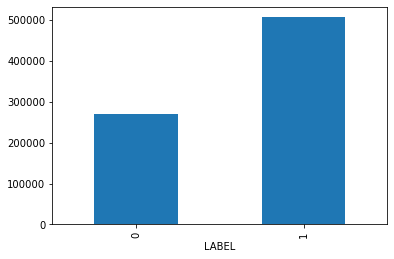

In [36]:
# visual representation of good and bad customers
df_vint.groupby('LABEL').LABEL.count().plot.bar(ylim=0)
plt.show()